In [56]:
import numpy as np
import matplotlib.pyplot as plt
import quandl 
import requests 
import json 
import pandas as pd 
import datetime 


# OLS estimates  from standard OLS formula

### Bitcoin Daily Time series from 2017-01-01 to 2021-07-01 using QUANDL API

In [279]:
#Obtain BTC prices from Qualdl 
quandl.ApiConfig.api_key = 'a9NejCNZWKHWyyWRQ2wP'
x =quandl.get('BITFINEX/BTCUSD', start_date='2017-01-01', end_date='2021-07-01')
x=x.reset_index()
x=x.rename(columns={"Date": "time"})
x

,time,High,Low,Mid,Last,Bid,Ask,Volume
0,2017-01-01,968.2,945.01,966.995,966.610000,966.62,967.37,7147.774423
1,2017-01-02,1006.5,961.26,998.290,999.240000,997.34,999.24,13440.456264
2,2017-01-03,1035.0,994.10,1019.450,1019.500000,1019.30,1019.60,21804.197216
3,2017-01-04,1040.0,1013.50,1038.500,1038.000000,1038.00,1039.00,14128.625714
4,2017-01-05,1150.0,1036.40,1138.650,1139.600000,1138.60,1138.70,53698.692041
...,...,...,...,...,...,...,...,...
1609,2021-06-27,34380.0,31799.00,34247.500,34265.396951,34243.00,34252.00,29518.794084
1610,2021-06-28,35319.0,33897.00,34424.000,34428.482199,34419.00,34429.00,6583.076066
1611,2021-06-29,36600.0,34151.00,36154.000,36142.000000,36153.00,36155.00,5442.171284
1612,2021-06-30,36197.0,34428.00,34885.500,34888.368009,34881.00,34890.00,3345.769838


### Etherium Daily Time series from 2017-01-01 to 2021-07-01 using CRYPTOCOMPARE API

In [235]:
#Obtain ETH prices from Cryptocompare for the last 2000days
my_crypto_key = "C370e1baf8f2aedafb5e730b7c103cf0ff064111eca3b0860878dcf47ec2457e"
URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=2000&api_key=' 
URL = URL_A + my_crypto_key 
URL

'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=2000&api_key=C370e1baf8f2aedafb5e730b7c103cf0ff064111eca3b0860878dcf47ec2457e'

In [280]:
#Convert Jason to a DataFrame
data = requests.get(URL) 
json_data = data.json() 
table = pd.json_normalize(json_data, 'Data').set_index('time')
table.index = pd.to_datetime(table.index , unit='s')
#Select the highest price and the date from 2017-01-01 to 2021-07-01
y=table[['high']]
y=y.reset_index()
start_date = "2017-01-01"
end_date = "2021-07-01"
after_start_date = y['time'] >= start_date
before_end_date = y['time'] <= end_date
y = y.loc[after_start_date & before_end_date]
y

,time,high
336,2017-01-01,8.891
337,2017-01-02,8.568
338,2017-01-03,9.940
339,2017-01-04,11.500
340,2017-01-05,10.370
...,...,...
1974,2021-06-27,1984.580
1975,2021-06-28,2143.600
1976,2021-06-29,2245.380
1977,2021-06-30,2287.050


We can observe that despite having the same dates, different numbers of days are obtained, since BITFINEX (Quandl) did not register every day. So the dataframes are going to be merged by date.

In [281]:
df_merge_col = pd.merge(x, y, on='time')
df_merge_col

,time,High,Low,Mid,Last,Bid,Ask,Volume,high
0,2017-01-01,968.2,945.01,966.995,966.610000,966.62,967.37,7147.774423,8.891
1,2017-01-02,1006.5,961.26,998.290,999.240000,997.34,999.24,13440.456264,8.568
2,2017-01-03,1035.0,994.10,1019.450,1019.500000,1019.30,1019.60,21804.197216,9.940
3,2017-01-04,1040.0,1013.50,1038.500,1038.000000,1038.00,1039.00,14128.625714,11.500
4,2017-01-05,1150.0,1036.40,1138.650,1139.600000,1138.60,1138.70,53698.692041,10.370
...,...,...,...,...,...,...,...,...,...
1609,2021-06-27,34380.0,31799.00,34247.500,34265.396951,34243.00,34252.00,29518.794084,1984.580
1610,2021-06-28,35319.0,33897.00,34424.000,34428.482199,34419.00,34429.00,6583.076066,2143.600
1611,2021-06-29,36600.0,34151.00,36154.000,36142.000000,36153.00,36155.00,5442.171284,2245.380
1612,2021-06-30,36197.0,34428.00,34885.500,34888.368009,34881.00,34890.00,3345.769838,2287.050


Text(0, 0.5, 'y (ETH)')

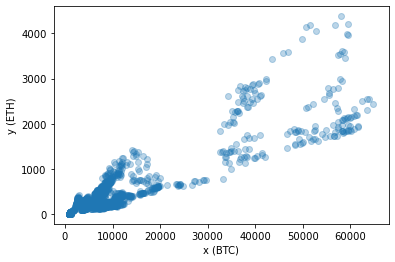

In [282]:
#x(BTC) and y(ETH) are obtained from the Dataframe
x=df_merge_col[['High']]
y=df_merge_col[['high']]
# Plot of X and Y
plt.scatter(x,y,alpha=.3)
plt.xlabel("x (BTC)")
plt.ylabel("y (ETH)")

In [284]:
x=np.array(x)
y=np.array(y)
type(x)

numpy.ndarray

## OLS estimates of $\beta$  and  $\alpha$

In [285]:
#Beta and Alpha
beta = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
alpha =np.mean(y)-beta*np.mean(x)
print("alpha =",alpha, "\nbeta =",beta)

alpha = -17.142561169657483 
beta = 0.04400889347009375


In [286]:
#Error
y_hat = alpha + np.multiply(beta,x)
L = np.sum(np.multiply(y - y_hat,y - y_hat))
L


153424382.53527787

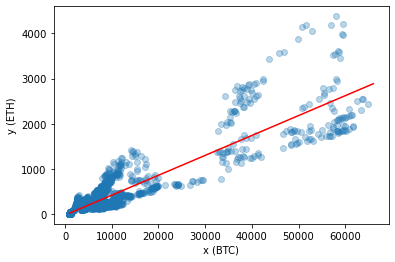

In [292]:
# Plot OSL
plt.scatter(x,y,alpha=.3)
plt.xlabel("x (BTC)")
plt.ylabel("y (ETH)")
plt.plot([968,66000],[alpha+beta*968,alpha+beta*66000], c="red")
plt.show()

In [ ]:
x1= np.array([np.ones(1614)])

In [148]:
#coins = pd.concat([coins, table.high],  axis=1) 
#coins.columns = pair 
#coins